In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

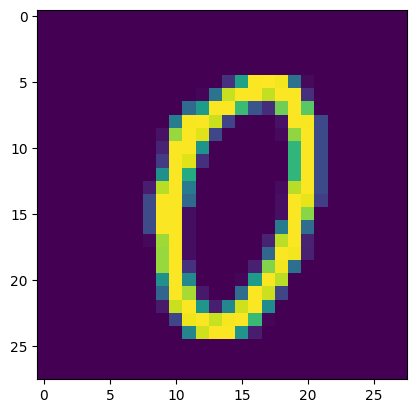

In [ ]:
plt.imshow(x_train[1000])

#CNN

In [ ]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    ReLU(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3)),
    ReLU(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3)),
    ReLU(),
    MaxPooling2D((2, 2), (3, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_model.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8007 - loss: 0.8380 - val_accuracy: 0.9558 - val_loss: 0.1525
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9719 - loss: 0.0906 - val_accuracy: 0.9777 - val_loss: 0.0790
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9802 - loss: 0.0628 - val_accuracy: 0.9791 - val_loss: 0.0707
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9844 - loss: 0.0520 - val_accuracy: 0.9826 - val_loss: 0.0616
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9858 - loss: 0.0441 - val_accuracy: 0.9788 - val_loss: 0.0710
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9872 - loss: 0.0393 - val_accuracy: 0.9813 - val_loss: 0.0734
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9872 - loss: 0.0401 - val_accuracy: 0.9801 - val_loss: 0.0851
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9897 - loss: 0.0320 - val_accuracy: 

Resim yolu girin: WhatsApp.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


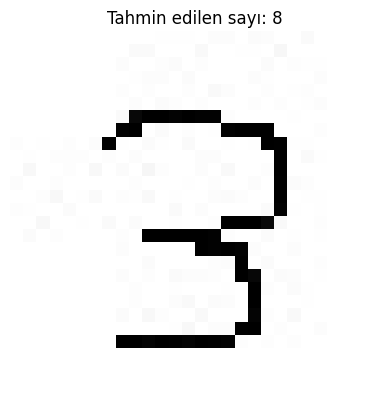

In [ ]:
from PIL import Image
import numpy as np

def tahmin(resim_yolu):
    resim = Image.open(resim_yolu).convert('L')
    resim = resim.resize((28, 28))
    resim_array = np.array(resim)
    img_array = resim_array.reshape(-1, 28, 28, 1)
    prediction = cnn_model.predict(img_array)
    predicted_number = np.argmax(prediction)
    print;("Tahmin edilen sayı")
    plt.imshow(resim, cmap='gray')
    plt.title(f"Tahmin edilen sayı: {predicted_number}")
    plt.axis('off')
    plt.show()
giris = input("Resim yolu girin: ")
tahmin(giris)
